In [1]:
#install.packages('deSolve')
# install.packages('ggplot2')
library("deSolve")
library("ggplot2")

Warning message:
"package 'deSolve' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [53]:
# most initial parameters are up here, except infusion rate (since it's interesting to change)

K_g = 0.1
H_g = 2
e = 1e-1

K_gs = 0.01
H_gs = H_g

K_sg = 0.0001
H_sg = H_g

K_d = 0.001


In [54]:
# functions for ODE solving here

monod <- function(S, Ks){ # since it gets called a lot 
  return (S/(Ks+S))
}

clamp <- function(x, lower, upper){ # It's possible for a small approximation error to create a negative value, which causes issues
  if (x < lower){return(lower)}
  else if (x>upper){return(upper)}
  else{return(x)}
  
}

f <- function(t, y, params){ # Main ODE system
  G = y[1]
  R = y[2]
  S = y[3]
  i = params[1]
  
  RN = R

  N = K_g*G*monod(R,H_g)
  T_gs = K_gs * G * (1-monod(R, H_gs))
  T_sg = K_sg * S * monod(R, H_sg)
  
  dNdt = N - T_gs + T_sg
  dSdt = T_gs - T_sg - K_d*S
  dRdt = -e*N + i
  
#  dNdt <- clamp(dNdt, lower=-N, upper=99999)
#  dRdt <- clamp(dRdt, lower=-R, upper=99999)
#  dSdt <- clamp(dSdt, lower=-S, upper=99999)
  
  temp <- c(dNdt, dRdt, dSdt)
  L = list(temp)
  
  return(list(temp))
}

In [55]:
# Playing with the model here. 
out = data.frame()

# Let the population grow to its normal equilibrium size
times <- seq(0,to=10000,by=1)
initials <- c(G=1, R=10, S=0)
out_1 <- as.data.frame(ode(func=f,y=initials,parms = c(i=0.1),times=times))
out <- rbind(out, out_1)

In [56]:
# Give the population some new resources
L = length(out$time)
times <- seq(out$time[L],to=out$time[L]+10000,by=1)
initials <- c(G=out$G[L], R=out$R[L]+20, S = out$S[L])
out_1 <- as.data.frame(ode(func=f,y=initials,parms = c(i=0.1),times=times))
out <- rbind(out, out_1)

In [57]:
# Remove the constant infusion of resources
L = length(out$time)
times <- seq(out$time[L],to=out$time[L]+10000,by=1)
initials <- c(G=out$G[L], R=out$R[L], S = out$S[L])
out_1 <- as.data.frame(ode(func=f,y=initials,parms = c(i=0.0),times=times))
out <- rbind(out, out_1)

In [58]:
# Bring the population back
L = length(out$time)
times <- seq(out$time[L],to=out$time[L]+10000,by=1)
initials <- c(G=out$G[L], R=out$R[L], S = out$S[L])
out_1 <- as.data.frame(ode(func=f,y=initials,parms = c(i=0.1),times=times))
out <- rbind(out, out_1)

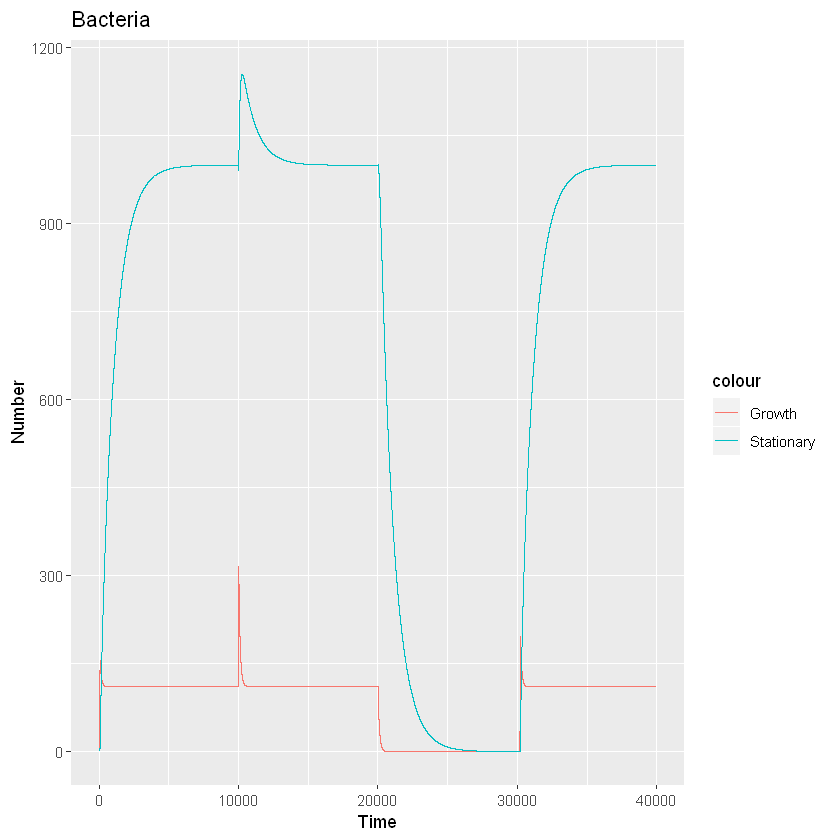

In [67]:
# Plot our populations over time (I can't make a nice legend right now; RED is total bacteria, BLUE is stationary phase, GREEN is growth phase)
ggplot(out, aes(time))+geom_line(aes(y=G, color='Growth'))+geom_line(aes(y=S, color='Stationary'))  + labs(title='Bacteria', x='Time', y='Number') 

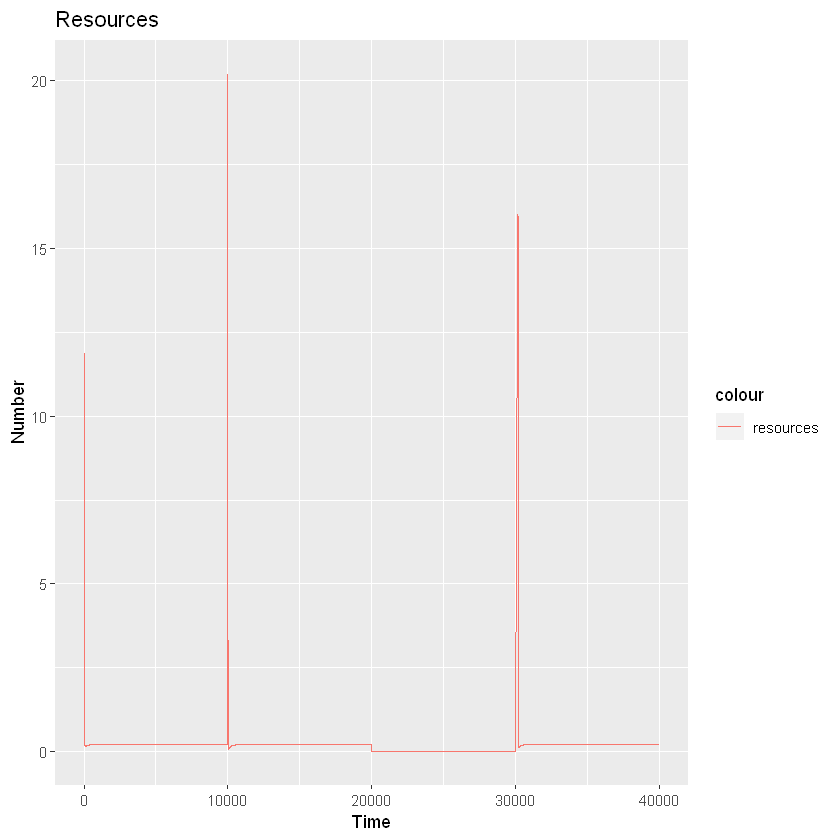

In [68]:
ggplot(out, aes(time, color='resources'))+geom_line(aes(y=R)) + labs(title='Resources', x='Time', y='Number') +scale_fill_discrete('Legend', labels=c('S', 'G'))